# Breast Cancer Prediction

This notebook will use python-based machine learning tools and libraries to build a machine learning model used to predict whether someone will have breast cancer or not based on features of the breast mass. 

This notebooks will have following parts:
1. Problem definition
2. Data source
3. Evaluation
4. Features
5. Modeling
6. Summary and Experiment

## 1. Problem  Definition
   > In a statement, given a patient and clinical parameters of his / her breast mass, can we predict if the mass is benign or malignant?

## 2. Data Source
The original data set come from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/breast+cancer which is also availiable on Kaggle https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.

## 3. Evaluation
> If we can reach 95% accuracy at predicting the benignness or malignantnancy of the mass, we will pursue the project. 

## 4. Features
The following is the dictionary for the dataset:

  * ID number
  * Diagnosis (M = malignant, B = benign)

  Ten real-valued features are computed for each cell nucleus

- radius_mean: mean of distances from center to points on the perimeter
- texture_mean: standard deviation of gray-scale values

- perimeter_mean: mean size of the core tumor

- area_mean: (no description provided)

- smoothness_mean: mean of local variation in radius lengths

- compactness_mean: mean of perimeter^2 / area - 1.0

- concavity_mean: mean of severity of concave portions of the contour

- concave points_mean: mean for number of concave portions of the contour

- symmetry_mean: (no description provided)

- fractal_dimension_mean: mean for "coastline approximation" - 1

- radius_se: standard error for the mean of distances from center to points on the perimeter

- texture_se: standard error for standard deviation of gray-scale values

- perimeter_se: (no description provided)

- area_se: (no description provided)

- smoothness_se: standard error for local variation in radius lengths

- compactness_se: standard error for perimeter^2 / area - 1.0

- concavity_se: standard error for severity of concave portions of the contour

- concave points_se: standard error for number of concave portions of the contour

- symmetry_se: (no description provided)

- fractal_dimension_se: standard error for "coastline approximation" - 1

- radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

- texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

- perimeter_worst: (no description provided)

- area_worst: (no description provided)

- smoothness_worst: "worst" or largest mean value for local variation in radius lengths

- compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

- concavity_worst: "worst" or largest mean value for severity of concave portions of the contour concave 

- points_worst: "worst" or largest mean value for number of concave portions of the contour

- symmetry_worst: (no description provided)

- fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

### Before setting up the model, let's import tools we need.
In this project, we need NumPy, Pandas and Matploylib for data analysis and manipulation. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

Our machine learning model and corresponding evalutions will be based on sklearn:

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [3]:
breast_cancer = pd.read_csv('breast cancer.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Cleaning the data
Since the columns `id` and `Unnamed: 32`, which is full of `NaN`, are irrelevant to making the prediction, let's drop them first:

In [4]:
breast_cancer = breast_cancer.drop(['id', 'Unnamed: 32'], axis = 1)

Next, let's make every value in the dataset numerical. Particularly, we only need to manipulate `diagnosis` by changing `B` (benign) to `0` and `M` (malignant) to `1`.

In [5]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace(['B', 'M'],[0, 1])
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Exploration

####  1. Is there any missing values?

In [6]:
breast_cancer.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Yay! No missing value!

Next, let's look at statistic summary of the dataset:

In [7]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 2. Are there any patterns?
First let's see how many benigns and malignants in the dataset:

In [8]:
breast_cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

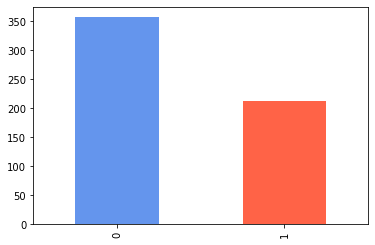

In [9]:
breast_cancer['diagnosis'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'tomato'] );

There are 357 patients diagnosed benign and 212 patients diagnosed malignant.

Next, we want to see if radius and concavity (A high concavity means that the boundary of the cell nucleus has indentations, and thus is rather rough than smooth) will affect the frequency of breast cancer by using `radius_mean` and `concavity_mean`:

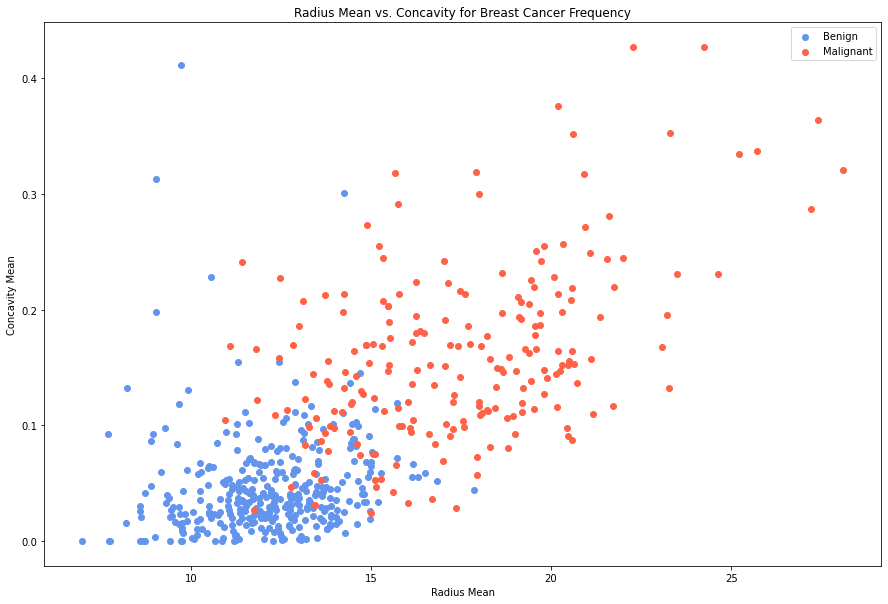

In [10]:
plt.figure(figsize = (15,10))

#Plot the scatter figure for group benign
plt.scatter(breast_cancer['radius_mean'][breast_cancer['diagnosis'] == 0],
            breast_cancer['concavity_mean'][breast_cancer['diagnosis'] == 0],
           color = 'cornflowerblue') 

#Plot the scatter figure for group malignant
plt.scatter(breast_cancer['radius_mean'][breast_cancer['diagnosis'] == 1],
            breast_cancer['concavity_mean'][breast_cancer['diagnosis'] == 1],
           color = 'tomato')

#Add some information to make the graph more readable
plt.title('Radius Mean vs. Concavity for Breast Cancer Frequency')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Mean')
plt.legend(['Benign', 'Malignant']);

From the figure above we can see that there is a pattern among `malignant` such that the larger the radius mean is, the higher the concavity mean is.
    However, data from `benign` clusters in the left corner of the figure. Let's check the distribution of the data:

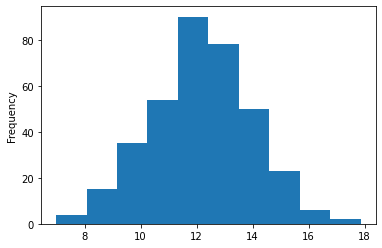

In [11]:
breast_cancer['radius_mean'][breast_cancer['diagnosis'] == 0].plot.hist();

This histogram tells us in group `benign`, most of (the values of) `radius_mean` fall between 12 to 14 which explains why `benign` cluster between (`radius_mean`) 10 and 15.

Next, we want to find out some correlations between each column (feature of the breast mass) in the dataset and we are going to use correlation matrix:

In [12]:
corrlation_matrix = breast_cancer.corr()
corrlation_matrix.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


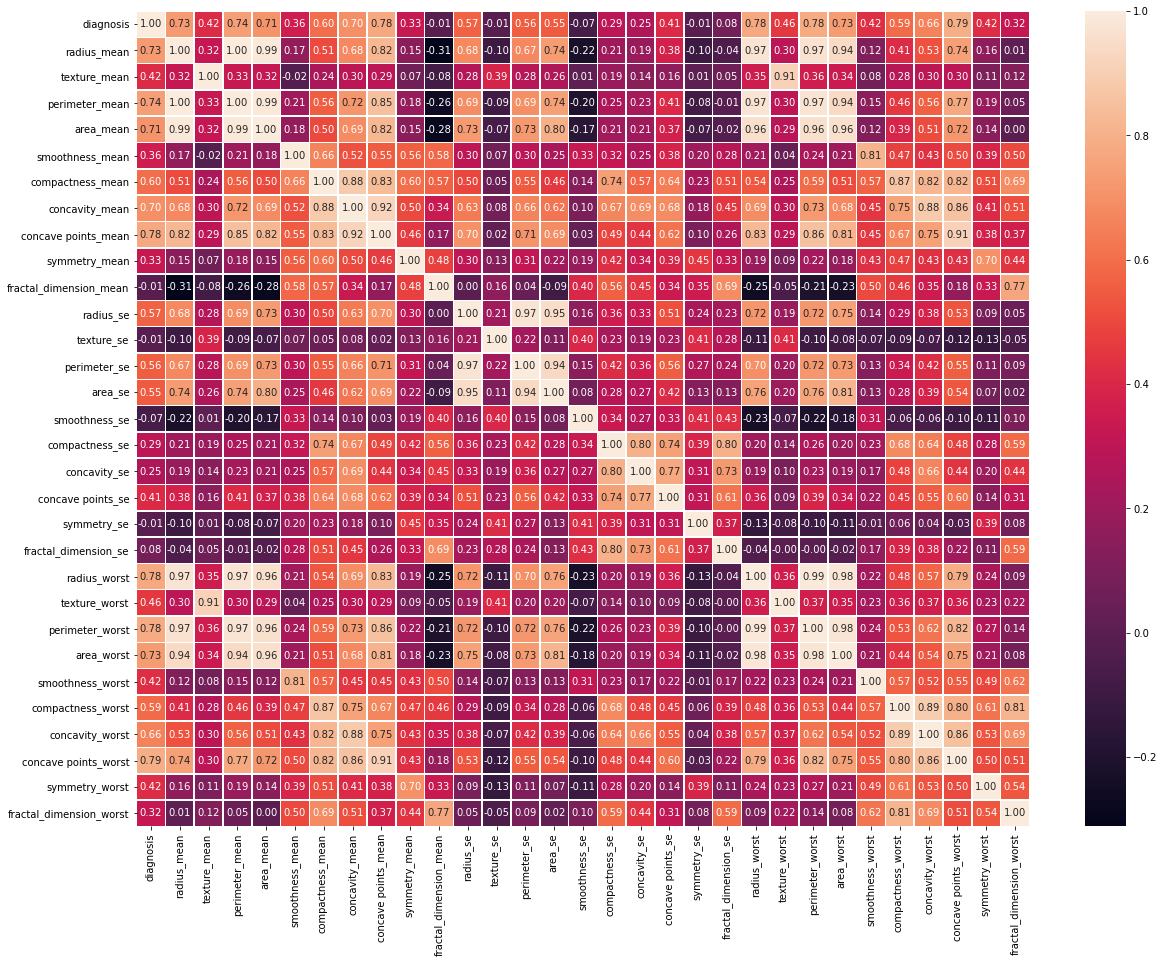

In [13]:
#... and let's visualize the  correlation matrix
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corrlation_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f")

## 5. Modeling

In [14]:
# A quick reminder of how our data looks like
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
#Split the data into X and y set
X = breast_cancer.drop('diagnosis', axis = 1)
y = breast_cancer['diagnosis']

#In order to reproduce the result, use np.random.seed
np.random.seed(100)

#Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

Now, we split data into train and test sets and it is time to build our machine learning model.

We'll use train set to train the model and use test set to test it.

We are going to build three models in this session:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [16]:
# In order to avoid redundancy, let's write a function which passes all models and returns scores for each model

#First, we put all three models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN' : KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#Write the function:
def scores(models, X_train, X_test, y_train, y_test):
        #Set random seed
        np.random.seed(100)
        #Create an empty dictionary to store scores for each model
        model_scores = {}
        #Loop through models
        for name, model in models.items():
            model.fit(X_train, y_train)
            model_scores[name] = model.score(X_test, y_test) 
        return model_scores

In [17]:
#View scores for each model:
scores(models, X_train, X_test, y_train, y_test)

/Users/xuhan/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9473684210526315,
 'KNN': 0.9473684210526315,
 'Random Forest': 0.956140350877193}

These scores are high, and luckly the score of Random Forest already reaches 95%. But we will see if we can still improve the score and  therefore reach a higher accuracy by tuning models.

### Hyperparameter tuning - KNN model
In this part, we are trying to find out the best value of n-neighbors which will return the highest score. 

Note the default value of n-neighbors is 5.

In [18]:
#Create empty list for training scores and test scores
training_scores = []
test_scores = []

#create a list with different values of n-neighbors
neighbors = range(1,21)

#Fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Loop through different value of n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [19]:
training_scores, test_scores

([1.0,
  0.945054945054945,
  0.9538461538461539,
  0.9362637362637363,
  0.9406593406593406,
  0.9428571428571428,
  0.945054945054945,
  0.9406593406593406,
  0.9406593406593406,
  0.9340659340659341,
  0.9362637362637363,
  0.9362637362637363,
  0.9362637362637363,
  0.9318681318681319,
  0.9318681318681319,
  0.9230769230769231,
  0.9230769230769231,
  0.9252747252747253,
  0.9274725274725275,
  0.9230769230769231],
 [0.9298245614035088,
  0.9298245614035088,
  0.9473684210526315,
  0.9473684210526315,
  0.9473684210526315,
  0.9473684210526315,
  0.9473684210526315,
  0.956140350877193,
  0.956140350877193,
  0.9649122807017544,
  0.956140350877193,
  0.9649122807017544,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.9649122807017544])

Maximum score on test data:96.49%


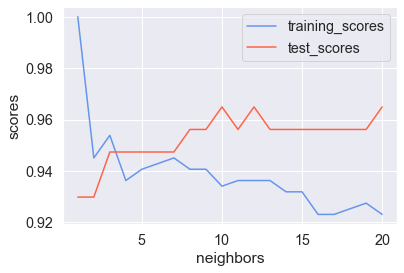

In [155]:
#We got lists of training scores and test scores. Now we will visualize them
plt.plot(neighbors, training_scores, label = 'training_scores', color = 'cornflowerblue')
plt.plot(neighbors, test_scores, label = 'test_scores', color = 'tomato')
plt.xlabel('neighbors')
plt.ylabel('scores')
plt.legend();

print(f'Maximum score on test data:{max(test_scores)*100:.2f}%')

Now we can tell that when n = 10, 12 and 20, the score reaches its maximum which is 96.49%.

### Hyperparameter tuning - RandomizedsearchCV  - Logistic Regression
In the previous parts, we tune the hyperparameter of knn by hand. Now, we are going to use `RandomizedsearchCV` in order to tune `Logisticregression` and `RandomForestClassifier`.

In [21]:
#Create a grid for logistic regression
log_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ['liblinear']}

In [22]:
#Tuning for logistic regression
log_rs = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = log_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

#Fit the model
log_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
#What is the best pair of parameters returning the highest score?
log_rs.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [24]:
#And the score of the tuned logistic regression model is
log_rs.score(X_test, y_test)

0.956140350877193

By hyperparameter tuning via randomizedsearchCV, we increase the score from 0.947 to 0.956 for our logistic regression model. Then, let's do the same for randomforestclassifier as well:

### Hyperparameter tuning  - RandomizedsearchCV - RandomForestClassifier

In [25]:
#Create a grid for random forest classifier
clf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10,2)}

In [26]:
#Tuning for random forest classifier
clf_rs = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = clf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
#Fit the model
clf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
#what is the best pair of parameters returning the highest score?
clf_rs.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [28]:
#And the score of the tuned random forest classifier model is
clf_rs.score(X_test, y_test)

0.9649122807017544

### Hyperparameter tuning  - GridSearchCV - LogisticRegressor
Now scores of all our models reach 95%. But we still want to improve scores by using GridSearchCV (Exhaustive search over specified parameter values for an estimator.)

In [29]:
log_gs = GridSearchCV(LogisticRegression(),
                     param_grid = log_grid,
                     cv = 5,
                     verbose = True)
log_gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [30]:
log_gs.score(X_test, y_test)

0.956140350877193

In [31]:
#Let's compare the score of logistic regression
log_rs.score(X_test, y_test), log_gs.score(X_test, y_test)

(0.956140350877193, 0.956140350877193)

In [32]:
#Let's see the best pair of parameters returning the highest score
log_rs.best_params_, log_gs.best_params_

({'solver': 'liblinear', 'C': 545.5594781168514},
 {'C': 545.5594781168514, 'solver': 'liblinear'})

Luckly, RandomizedSearchCV has already helped us find out the best pair of parameters, which explains why the logisic regressor model returns the same score after being tuned by randomizedsearchCV and gridsearchCV.

Since gridSearchCV is an expensive algorithm, and there can be thousands of fits in total which will take a long period of time to go through, we will skip gridSearchCV for randomforest classifier. 

Now, let's put scores of tuned models together:

In [38]:
scores = {'KNN':[max(test_scores)], 
          'Logistic Regression': [log_gs.score(X_test, y_test)],
          'RandomForest Classifier': [clf_rs.score(X_test, y_test)]}
accuracy_score_board = pd.DataFrame(data=scores)
accuracy_score_board

,KNN,Logistic Regression,RandomForest Classifier
0,0.964912,0.95614,0.964912


All three models reach the accuracy score of 95% and KNN and RandomForest Classifier have the same score of approximately 96%. In the following parts, we will just choose RandomForest Classifier and evaluate it further.

### Evaluating our machine learning classifier beyond accuracy
and we will look at:
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

#### 1. ROC and AUC

In [41]:
#Let's make some predictions by using random forest classifier 
clf_y_predicts = clf_rs.predict(X_test)

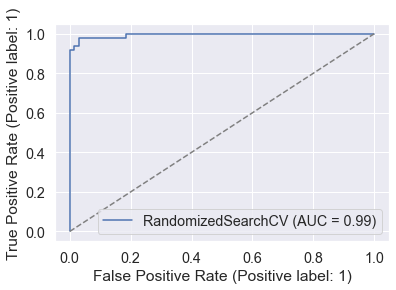

In [157]:
#Plot ROC and calculate AUC
plot_roc_curve(clf_rs, X_test, y_test);

#...and we add a"guessing" line
plt.plot([0,1], [0,1], color = 'grey', 
             label = 'guessing', linestyle = '--')

For a perfect model, AUC will equal to 1. For our Random Forest Classifier, we have AUC = 0.99, which is highly accurate.

#### 2. confusion matrix

Confusion matrix gives information about:
* True positive (true value = 1, prediction = 1),
* False positive (true value = 0, prediction = 1), 
* True negative (true value = 0, prediction = 0),
* False negative (true value = 1, prediction = 0).

In [159]:
#Print the confusion matrix for our classifier
conf_mat_clf = confusion_matrix(y_test, clf_y_predicts)
conf_mat_clf

array([[64,  1],
       [ 3, 46]])

In [110]:
#We write a function to visualize the confusion matrix by using heatmap
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(conf_mat,
                    annot = True, #annot the box
                    cbar = False)
    sns.set(font_scale=1.3)
    plt.xlabel('True label')
    plt.ylabel('False label')

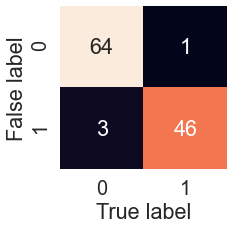

In [111]:
plot_conf_mat(conf_mat_clf)

For our random forest classifier, we only have 3 false positive(this patient does not have breast caner, but we do predict s/he has) and 1 false negative(this patient does have breast caner, but we do predict s/he has not.) 

It is impossible to have 0 false positive or false negative in any model. In this project, we prefer less false negative since we are not willing to see any patient does not receive any proper treatment due to errors of our model.

#### 3. Classification report
In the following part, we will report accuracy, precision, recall and f1-score while using cross validation.

We first tune the model by using the best pair of hyperparameters and then use cross validation.

In [120]:
clf_best = RandomForestClassifier(n_estimators = 560,
                                min_samples_split = 4,
                                min_samples_leaf = 1,
                                max_depth = None)

In [160]:
#Print the classification report
print(classification_report(y_test, clf_y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In the evalution above, our model split the data to training and test set only once. But now, we will evaluate the model with cross-validation and report accuracy, precision, recall and f1-score of our random forest classifier by using `cross_val_score`.

In [114]:
#Accuracy
cvs_acc = np.mean(cross_val_score(clf_best,
                       X,
                       y,
                       cv = 5,
                       scoring = 'accuracy'))
cvs_acc

0.9631113181183046

In [115]:
#Precision
cvs_prec = np.mean(cross_val_score(clf_best,
                       X,
                       y,
                       cv = 5,
                       scoring = 'precision'))
cvs_prec

0.9623136553369112

In [116]:
#Recall
cvs_recall = np.mean(cross_val_score(clf_best,
                       X,
                       y,
                       cv = 5,
                       scoring = 'recall'))
cvs_recall

0.9343300110741971

In [119]:
#F1-score
cvs_f1_score = np.mean(cross_val_score(clf_best,
                       X,
                       y,
                       cv = 5,
                       scoring = 'f1'))
cvs_f1_score

0.9475330667970221

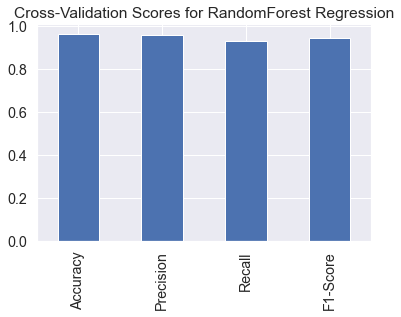

In [122]:
#Visualize the result
cv_metrics = pd.DataFrame({'Accuracy': cvs_acc,
                          'Precision': cvs_prec,
                          'Recall': cvs_recall,
                          'F1-Score': cvs_f1_score},
                         index = [0])
cv_metrics.T.plot.bar(title='Cross-Validation Scores for RandomForest Regression',
                     legend = False);

### What are important freatures affecting the frequency of breast cancer?

Even though we "give up" our logistic regression model because of the relatively lower score it has, logistic regression is still useful for helping us figure out which features (attributes of breast mass) give the strongest influence on the occurance of breast cancer.

In [132]:
#Recall the best pair of hyperparameters for the logitsic regression
log_rs.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [143]:
#Tuned the logistic regression
log_best = LogisticRegression(solver =  'liblinear', 
                              C = 545.5594781168514)

#Fit the model
log_best.fit(X_train, y_train)

#use .coef_ to get the coefficient of each attribute correlating with the frequency of breast caner
log_best.coef_

array([[-4.70882195e+00, -9.65880087e-02,  5.64486964e-03,
         4.19626323e-02,  4.22917702e+00,  1.06501440e-02,
         4.51351815e+00,  7.72331735e+00,  5.11602562e+00,
        -8.48146052e-01, -1.82803778e-01, -1.21222688e+00,
        -2.99116683e-01,  1.52974586e-01,  5.00490442e-01,
        -6.23354423e+00, -6.64963220e+00,  5.92136120e-01,
        -6.38936733e-01, -1.12221524e+00,  6.03300262e-01,
         3.81620512e-01,  2.33179415e-01, -7.11054297e-03,
         7.81378958e+00, -4.16482085e+00,  3.64969802e+00,
         1.41663513e+01,  7.12301736e+00, -1.02860263e+00]])

In [153]:
#Associate each coefficient with the corresponding attribute
feature_dict = dict(zip(breast_cancer.columns, list(log_best.coef_[0])))
feature_dict

{'diagnosis': -4.708821951285844,
 'radius_mean': -0.09658800873986526,
 'texture_mean': 0.005644869635519483,
 'perimeter_mean': 0.04196263229074326,
 'area_mean': 4.229177024573416,
 'smoothness_mean': 0.010650144024200772,
 'compactness_mean': 4.513518152667387,
 'concavity_mean': 7.723317346483272,
 'concave points_mean': 5.116025620490726,
 'symmetry_mean': -0.8481460517204474,
 'fractal_dimension_mean': -0.18280377798584455,
 'radius_se': -1.212226876447149,
 'texture_se': -0.29911668286882764,
 'perimeter_se': 0.1529745862460638,
 'area_se': 0.500490441667146,
 'smoothness_se': -6.233544229664699,
 'compactness_se': -6.649632199171022,
 'concavity_se': 0.5921361204564938,
 'concave points_se': -0.6389367326040284,
 'symmetry_se': -1.1222152411630182,
 'fractal_dimension_se': 0.6033002622900155,
 'radius_worst': 0.3816205115874268,
 'texture_worst': 0.23317941501880204,
 'perimeter_worst': -0.007110542972889392,
 'area_worst': 7.813789579587795,
 'smoothness_worst': -4.1648208475

<Figure size 7200x3600 with 0 Axes>

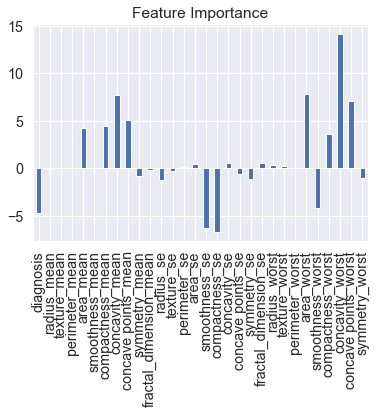

In [161]:
#Visualize coefficients to see which one has the strongest impact
from matplotlib.pyplot import figure
figure(figsize = (100,50));
feature = pd.DataFrame(feature_dict, index = [0])
feature.T.plot.bar(title = 'Feature Importance', legend = False);

From the plot above, we can conclude that `concavity_worst` influences the frequency of breast cancer most. 

(concavity_worst: "worst" or largest mean value for severity of concave portions of the contour concave)

## 6. Summary and Experiment

In this project, we use three different models - KNN, Logistic Regression and Random Forest Classifier - to predict the frequency of breast cancer. All these three model reach our goal of reaching at least 95% accuracy, and we used logistic regression to find out that the higher the mean value of severity of concave portion of the tumor is, the higher chance a patient has breast cancer.

However, besides tuning models as we did, there are still other ways to improve the accuracy. We could collect more data, tune different hyperparameters, or even try a different but maybe better model. 